# Imports

In [136]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline

# load the data

In [116]:
df_copy = pd.read_csv("C:/Users/golds/Documents/Studies/hit/Year B/semester A/Introduction to Data Science/Final Project/df_cleaned1.csv")
df = df_copy.copy()
df = df.drop('Unnamed: 0', axis=1)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3174 entries, 0 to 3173
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   title             3174 non-null   object
 1   long_title        3174 non-null   object
 2   category          3174 non-null   object
 3   main_reporter     3174 non-null   object
 4   num_of_reporters  3174 non-null   int64 
 5   content           3163 non-null   object
 6   views             3174 non-null   int64 
 7   url               3174 non-null   object
 8   number_of_words   3174 non-null   int64 
 9   interested        3174 non-null   int64 
 10  not_interested    3174 non-null   int64 
 11  publish_date_day  3174 non-null   int64 
 12  time_group        3174 non-null   int64 
dtypes: int64(7), object(6)
memory usage: 322.5+ KB


## Outliers

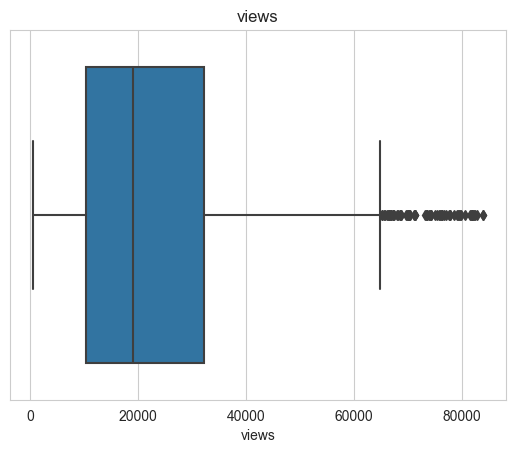

In [122]:
# style
sns.set_style("whitegrid")

# create boxplot with title
sns.boxplot(x=df["views"])
plt.title("views")

# Show plot
plt.show()

In [119]:
numcols=df[['views', 'interested', 'not_interested']]
for col in numcols:
    if np.issubdtype(df[col].dtype, np.number):
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col], 75)
        IQR = Q3 - Q1
        IQR_range = 1.5 * IQR

        dfcut = df[col]
        outlier = (dfcut < Q1 - IQR_range) | (dfcut > Q3 + IQR_range )
        df[col] = dfcut.where(~outlier,np.nan)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3174 entries, 0 to 3173
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   title             3174 non-null   object 
 1   long_title        3174 non-null   object 
 2   category          3174 non-null   object 
 3   main_reporter     3174 non-null   object 
 4   num_of_reporters  3174 non-null   int64  
 5   content           3163 non-null   object 
 6   views             2978 non-null   float64
 7   url               3174 non-null   object 
 8   number_of_words   3174 non-null   int64  
 9   interested        2982 non-null   float64
 10  not_interested    2844 non-null   float64
 11  publish_date_day  3174 non-null   int64  
 12  time_group        3174 non-null   int64  
dtypes: float64(3), int64(4), object(6)
memory usage: 322.5+ KB


In [121]:
# deleting rows with null value
df = df.dropna(axis=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2649 entries, 0 to 3173
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   title             2649 non-null   object 
 1   long_title        2649 non-null   object 
 2   category          2649 non-null   object 
 3   main_reporter     2649 non-null   object 
 4   num_of_reporters  2649 non-null   int64  
 5   content           2649 non-null   object 
 6   views             2649 non-null   float64
 7   url               2649 non-null   object 
 8   number_of_words   2649 non-null   int64  
 9   interested        2649 non-null   float64
 10  not_interested    2649 non-null   float64
 11  publish_date_day  2649 non-null   int64  
 12  time_group        2649 non-null   int64  
dtypes: float64(3), int64(4), object(6)
memory usage: 289.7+ KB


## Heat map

C:\Users\golds\AppData\Local\Temp\ipykernel_26824\3370694232.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True,cmap="vlag",linewidths=1)


<Axes: >

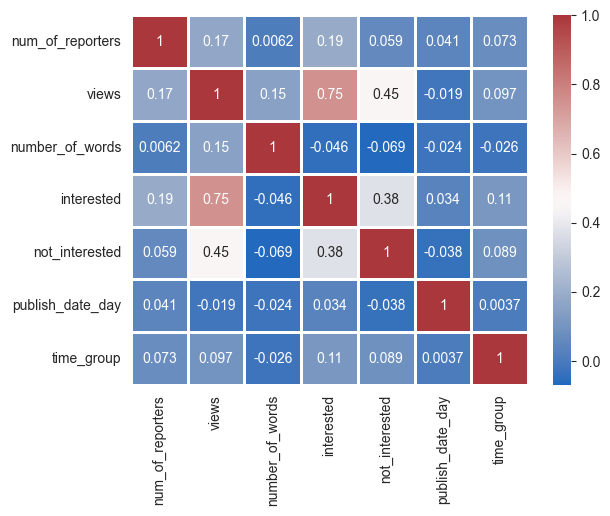

In [114]:
sns.heatmap(df.corr(), annot=True,cmap="vlag",linewidths=1)

## Subplots

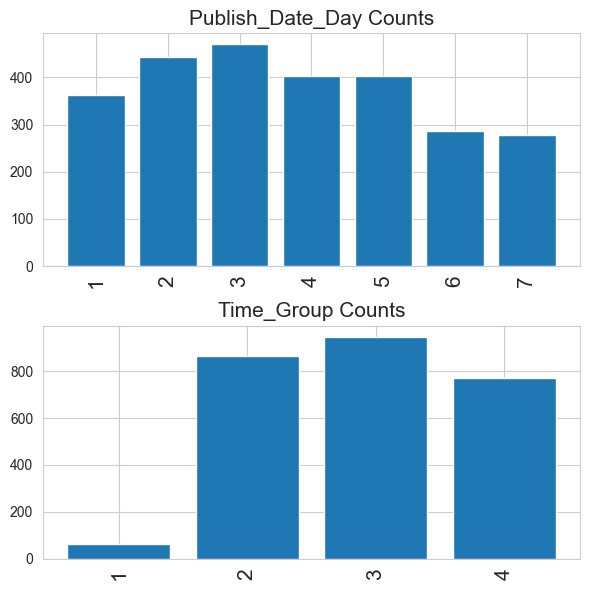

In [140]:
cols = ['publish_date_day','time_group']

fig, ax = plt.subplots(2,1,figsize=(6,6))

for i,col in enumerate(cols):

    series = df.groupby(df[col]).count()['title'].sort_values(ascending=False)
    ax[i].bar(series.index,series)
    ax[i].set_title(col.title()+" Counts",fontsize=15)
    ax[i].tick_params(labelrotation=90,axis='x',labelsize=15)
    ax[i].set(xlabel=None,ylabel=None)

plt.tight_layout()

plt.show()

## Pie chart

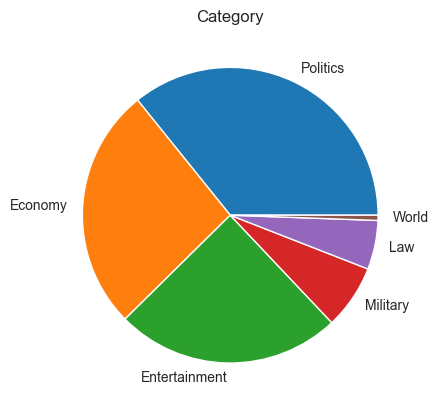

In [139]:
counts = df['category'].value_counts()
labels = ['Politics', 'Economy', 'Entertainment', 'Military', 'Law', 'World']
plt.pie(counts, labels=labels)
plt.title('Category')
plt.show()

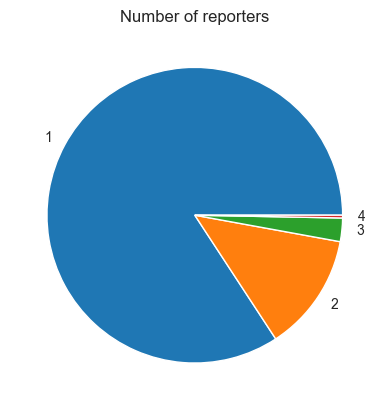

In [107]:
counts = df['num_of_reporters'].value_counts()
plt.pie(counts, labels=counts.index)
plt.title('Number of reporters')
plt.show()

## Kdeplot

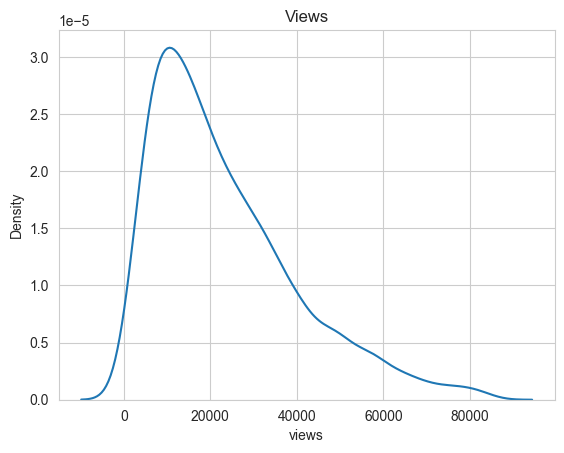

In [142]:
ax = sns.kdeplot(data=df, x="views")
ax.set(title="Views")
plt.show()

## Scatterplot

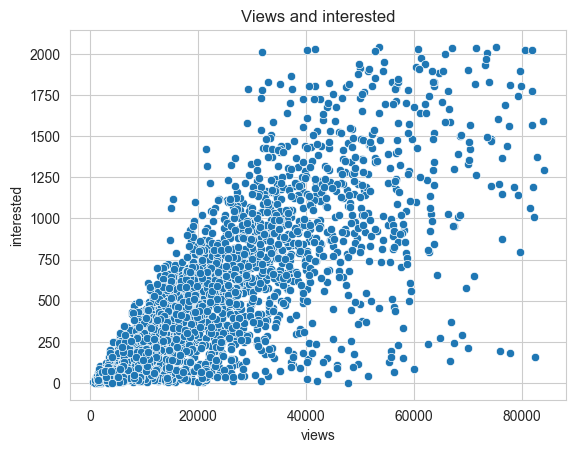

In [144]:
sp=sns.scatterplot(data=df, x="views", y="interested")
sp.set(title='Views and interested')
plt.show()

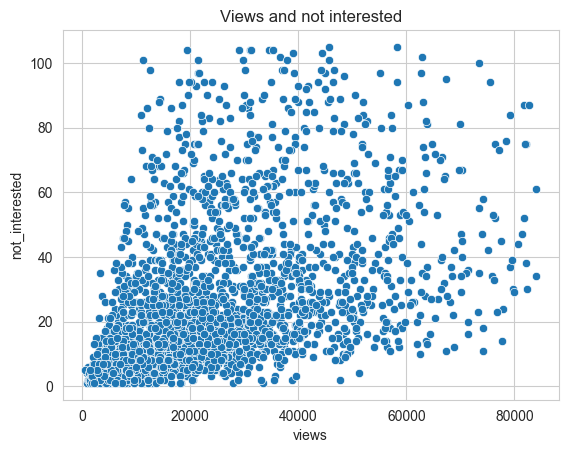

In [145]:
sp=sns.scatterplot(data=df, x="views", y="not_interested")
sp.set(title='Views and not interested')
plt.show()